# The Non-linear pendulum
Tarkan Yzeiri

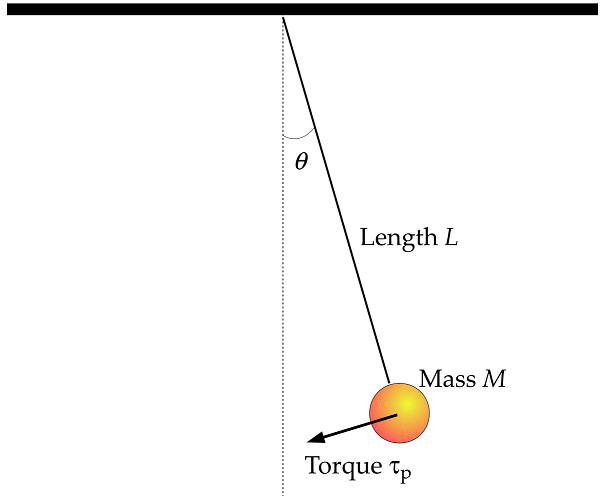

In [1]:
%matplotlib notebook

import numpy as np
import matplotlib.pyplot as plt

from IPython.display import Image # needed to embed an image
Image(filename='Pendulum.png', embed=True)

The image above (download/view it from Moodle if it doesn't show up) shows a pendulum of length $L$ with a bob of mass $M$. We assume that all the mass of the system is in the bob, and that the system is rigid.

The pendulum experiences a torque
$$
  \tau_p = MgL \sin(\theta),
$$

and we also know that the torque of a rigid body is  given by

$$
  \tau = I \alpha,
$$

where $I$ is the moment of inertia and $\alpha$ the angular
acceleration. These are given by

$$
  I = ML^2 \qquad \text{and} \qquad  \alpha = \frac{d\omega}{dt} = \frac{d^2\theta}{dt^2},
$$

where $\omega$ is the angular velocity.
We can then rewrite the equation for the torque in terms of the
angular position of the pendulum (note that a minus sign appears because the torque and the angle are measured in opposite directions):

$$
  \tau_p = - I \frac{d^2\theta}{dt^2}.
$$

Substituting and rearranging gives us the equation of motion for
the pendulum:

$$
  \frac{d^2\theta}{dt^2} = - \frac{MgL}{I} \sin(\theta) = - \frac{g}{L}
  \sin(\theta),
$$
 which tells us that the bob accelerates towards the rest point at $\theta = 0$, and that the acceleration is dependent on the sine of the angle of displacement.


Now, if we were solving this analytically, we'd be stuck - there's no exact analytical solution to this. We'd need to make an approximation in order to continue. The obvious one here is to use the small angle approximation, and put $\sin(\theta) \approx \theta$, which (as the name suggests) is only valid when $\theta$ is small. This transforms the problem into a linear ODE, which is simple to solve analytically, and gives familiar sinusoidal motion.

But by using our numerical methods, we can solve this system for big angles. We can separate out into two first-order equations, as before, where the two variables are now the angle $\theta$ (c.f. position $y$) and the angular velocity $\omega$ (c.f. y-velocity)

$$ \frac{d \theta}{d t} = \omega$$

$$ \frac{d \omega}{dt} = -\frac{g}{L}\sin\theta $$

2. Set up a python function, analogous to our function f(r,t) above, to calculate $\frac{d \theta}{d t}$  and $\frac{d \omega}{dt}$ for the non-linear case.

In [2]:
def angular(r,t): 
    '''Definition of the vector function to be solved
       for the pendulum bob.
    Inputs:
        r [array]: vector of angle (r[0]) and angular velocity (r[1])
        t: time point(s)
    Outputs:
        [ftheta, fomega]: numerical values of the respective simultaneous differential equations.
    '''
    theta = r[0]    # first element of r represents the angle of the particle
    omega = r[1]   # second element of r represents the angular velocity of the particle
    ftheta = omega     # d(theta)/dt is angular velocity (omega)
    fomega = -g/L * np.sin(theta)    # d(omega)/dt = -g/L sin(theta)
    return np.array([ftheta,fomega]) # convert ftheta and fomega to an array form

3. Use the Runge-Kutta routine as above
4. Plot the angle $\theta$ and the angular velocity $\omega$ as a function of time on a single appropriately labelled plot. 

In [3]:
def RK_2D(r,tpoints,function):
    '''Fourth-order Runge-Kutta rewritten for two or more simultaneous equations
    Inputs:
        r: array of values, one for each equation in the system
        tpoints: array of time values.
        function: the function to use to solve the system
    Outputs: 
        [thetapoints, omegapoints]: solutions for theta(t) and omega(t), numpy arrays of same length as tpoints'''
    thetapoints = [] # initialise empty arrays
    omegapoints = []
    for t in tpoints:
        thetapoints.append(r[0])
        omegapoints.append(r[1])
        k1 = h*function(r,t) 
        k2 = h*function(r+0.5*k1, t+0.5*h)
        k3 = h*function(r+0.5*k2, t+0.5*h)
        k4 = h*function(r+k3, t+h)
        r = r + (k1 + 2*k2 + 2*k3 + k4)/6
    return np.array([thetapoints, omegapoints]) # convert output to numpy array with 2 rows and N columns

<IPython.core.display.Javascript object>


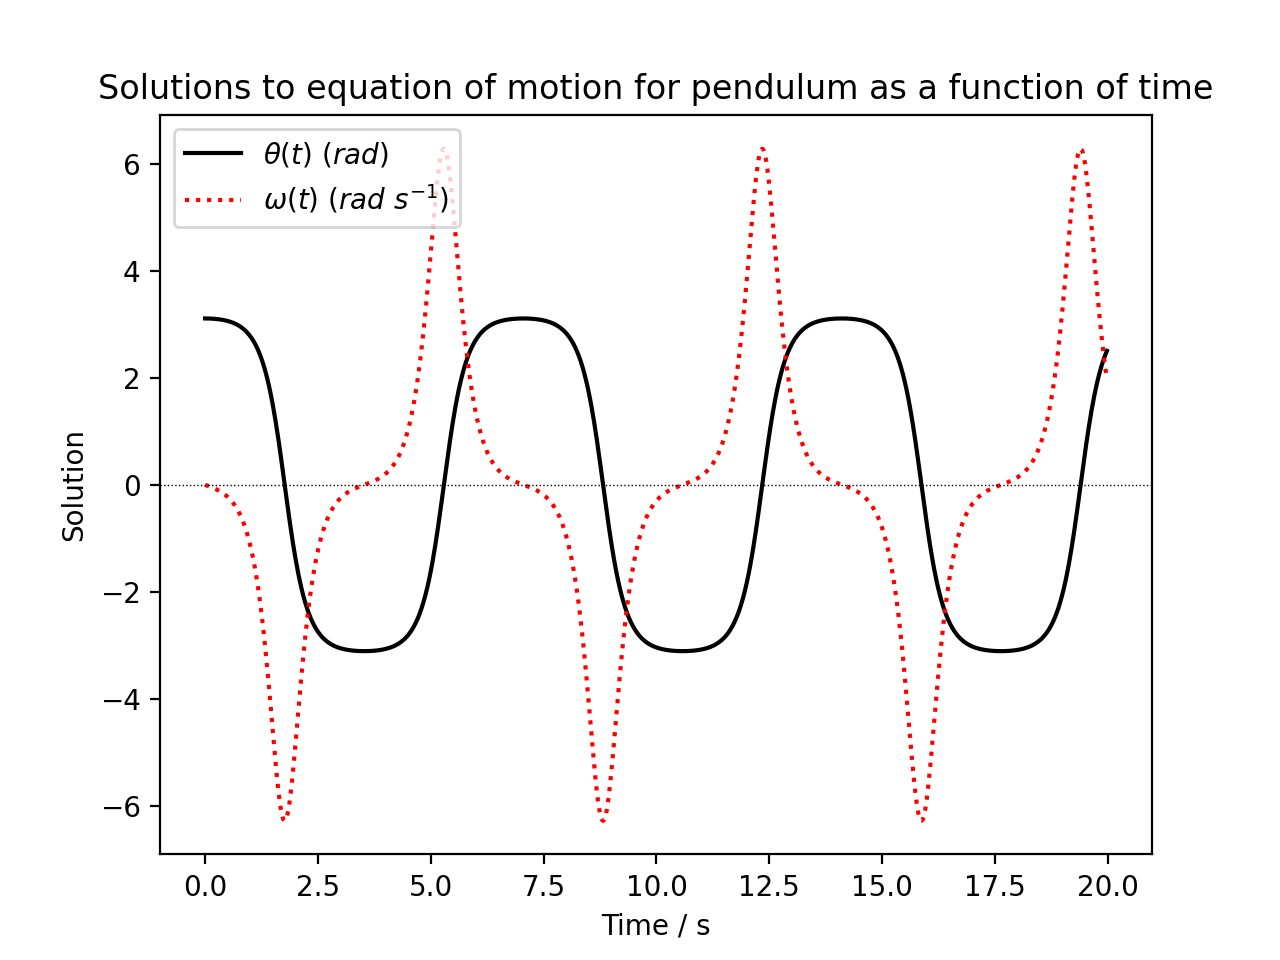

In [4]:
g = (np.pi)**2 # gravity / ms^(-2) ≈ pi**2
L = 1 # length of pendulum / m

ti = 0
tf = 20 # solve for a period of tf-ti seconds.
N = 1000 # number of points
h = (tf - ti)/N # difference between each point

tpoints = np.arange(ti, tf, h) # array of time intervals

#initial conditions
initialtheta = 0.99*np.pi
omegai = 0
r = np.array([initialtheta, omegai])

R = RK_2D(r,tpoints,angular) # numerical solutions from RK method

plt.figure()
plt.title("Solutions to equation of motion for pendulum as a function of time")
plt.plot(tpoints,R[0],"k", label = "$\\theta(t)$ ($rad$)")
plt.plot(tpoints,R[1],"r:", label ="$\omega(t)$ ($rad$ $s^{-1}$)")
plt.xlabel("Time / s")
plt.ylabel("Solution")
plt.axhline(c="k",ls=":", lw=0.5) # draw black dotted line at theta,omega = 0
plt.legend(loc="best") ;

5. In a separate plot, compare these results with results obtained from the linear approximation where  $\sin \theta \approx \theta$.

In [5]:
def angular_approx(ra,t): 
    '''Definition of the vector function to be solved
       for pendulum bob with sin(theta) ≈ theta.
    Inputs:
        r [array]: vector of angle (r[0]) and angular velocity (r[1])
        t: time point(s)
    Outputs:
        [ftheta, fomega]: numerical values of the respective simultaneous differential equations for the 
        small angle approximation.
    '''
    theta = ra[0]    # first element of r represents the angle of the particle
    omega = ra[1]   # second element of r represents the angular velocity of the particle
    ftheta = omega     # d(theta)/dt is angular velocity (omega)
    fomega = -g/L * theta    # d(omega)/dt = -g/L * theta
    return np.array([ftheta,fomega]) # convert ftheta and fomega to an array form

<IPython.core.display.Javascript object>


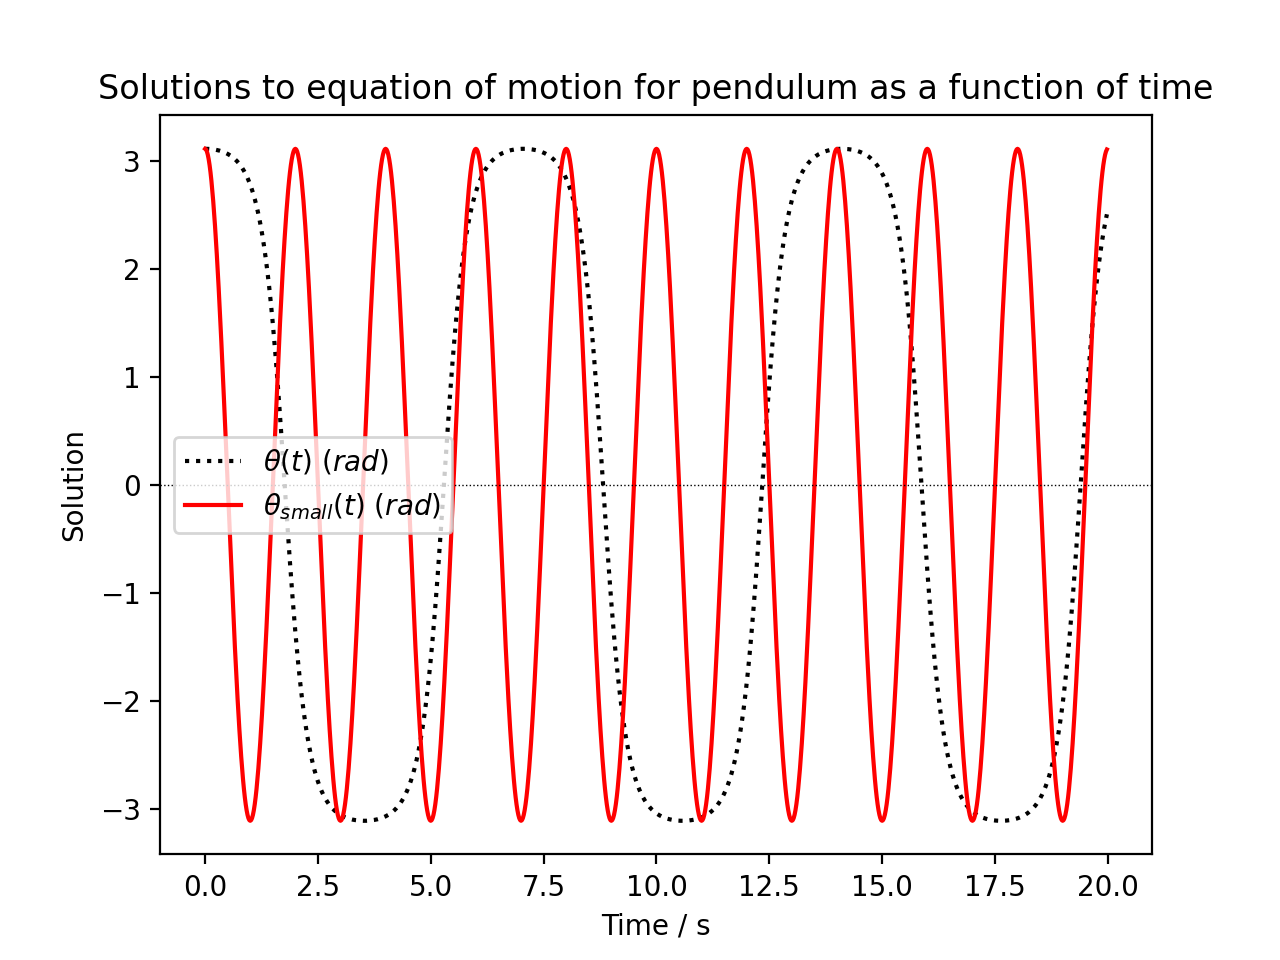

<IPython.core.display.Javascript object>


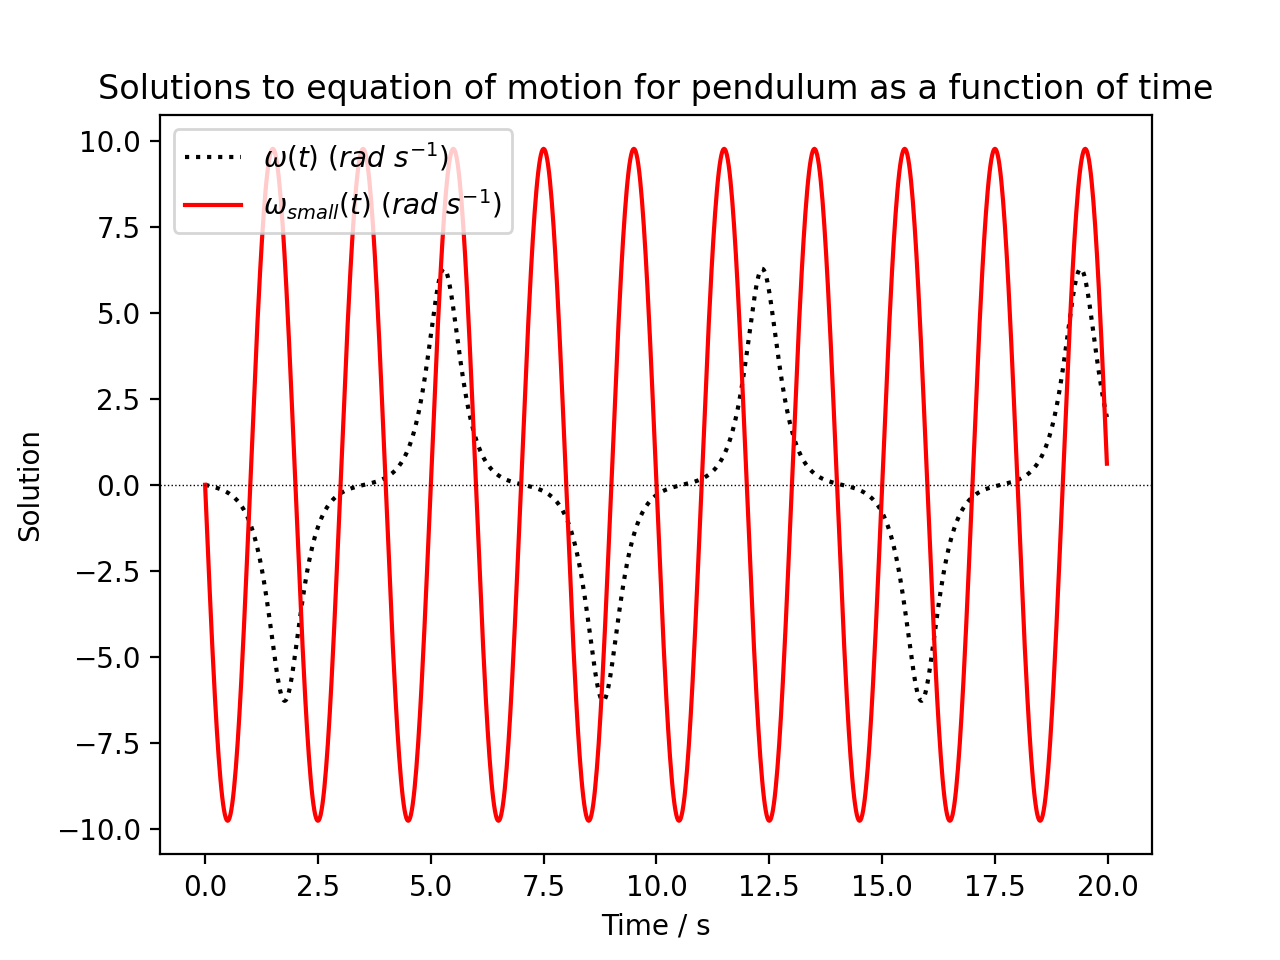

In [6]:
Rapp = RK_2D(r,tpoints,angular_approx) # numerical solutions from RK method (using sin(theta) ≈ theta)

#labels for both normal and small angle approximation plots
label = ["$\\theta(t)$ ($rad$)", "$\omega(t)$ ($rad$ $s^{-1}$)"]
labelapp = ["$\\theta_{small}(t)$ ($rad$)", "$\omega_{small}(t)$ ($rad$ $s^{-1}$)"]

for i in range(0,2):
    plt.figure()
    plt.title("Solutions to equation of motion for pendulum as a function of time")
    plt.plot(tpoints,R[i],"k:", label = label[i])
    plt.plot(tpoints,Rapp[i],"r", label =labelapp[i])
    plt.xlabel("Time / s")
    plt.ylabel("Solution")
    plt.axhline(c="k",ls=":", lw=0.5) # draw black dotted line at theta,omega = 0
    plt.legend(loc="best") ;

6.  To make our pendulum even more realistic, we can also include a damping term. For this we need to define a damping coefficient $c$, and to take into account the mass of the bob ($M = 0.1$ kg). The expression for the angular acceleration then becomes
$$
\frac{d \omega}{dt}  = -\frac{g}{L}\sin(\theta)  - \frac{c \omega}{M L^2}
$$
Write a new function to calculate for the damped motion of the pendulum, and plot these results in addition to the undamped results. Make sure you've used the process above where the name of the function is sent as an argument to the Runge Kutta function.

In [7]:
def angular_damp(r,t): 
    '''Definition of the vector function to be solved
       for pendulum bob with a damping constant.
    Inputs:
        r [array]: vector of angle (r[0]) and angular velocity (r[1])
        t: time point(s)
    Outputs:
        [ftheta, fomega]: numerical values of the respective simultaneous differential equations for a damped pendulum bob.
    '''
    theta = r[0]    # first element of r represents the angle of the particle
    omega = r[1]   # second element of r represents the angular velocity of the particle
    ftheta = omega     # d(theta)/dt is angular velocity (omega)
    fomega = -g/L * np.sin(theta) - c*omega/(M*L**2)   # d(omega)/dt = -g/L sin(theta) - c*omega/(M*L^2)
    return np.array([ftheta,fomega]) # convert ftheta and fomega to an array form

<IPython.core.display.Javascript object>


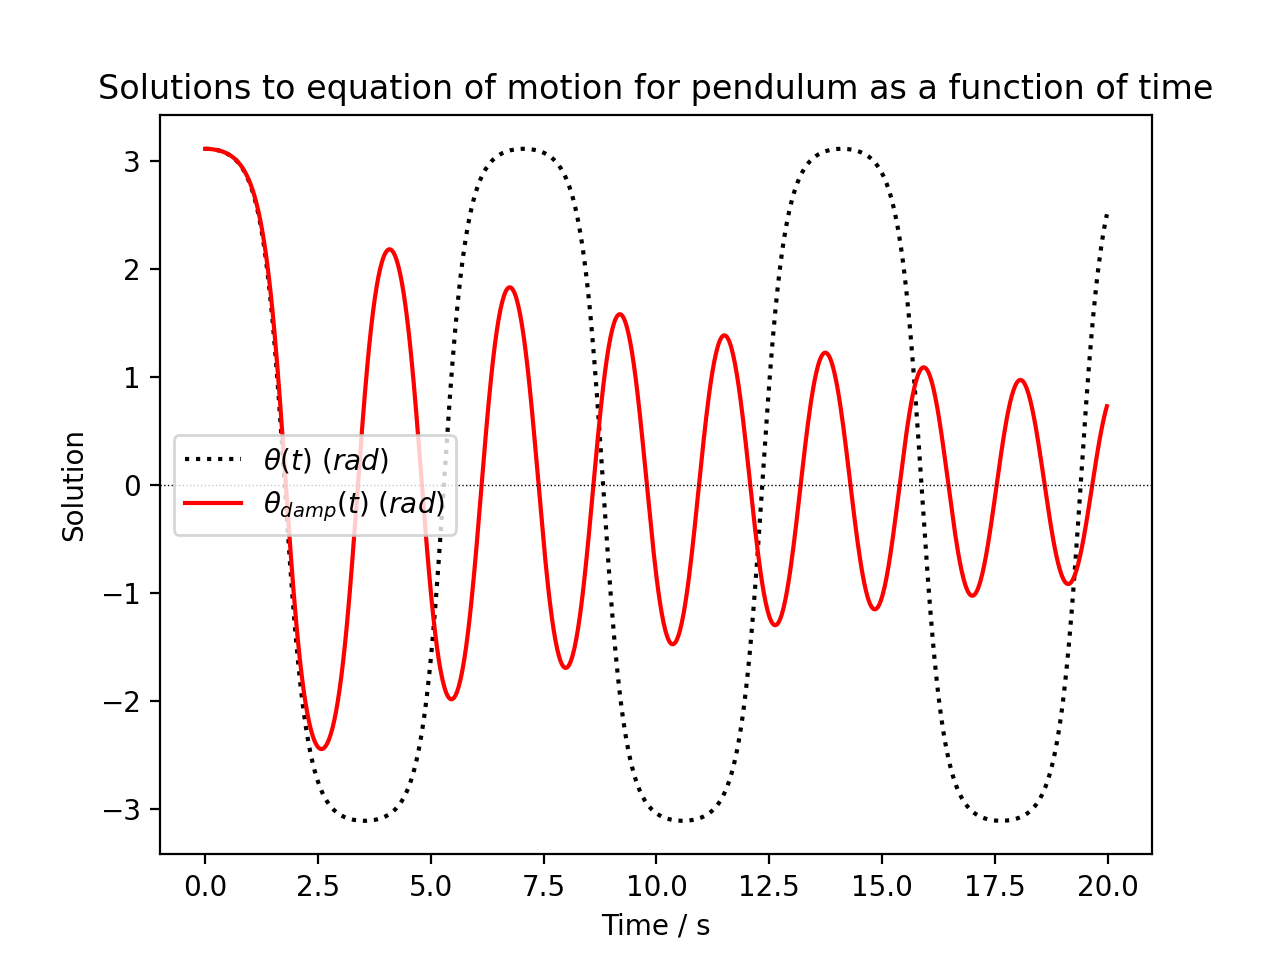

<IPython.core.display.Javascript object>


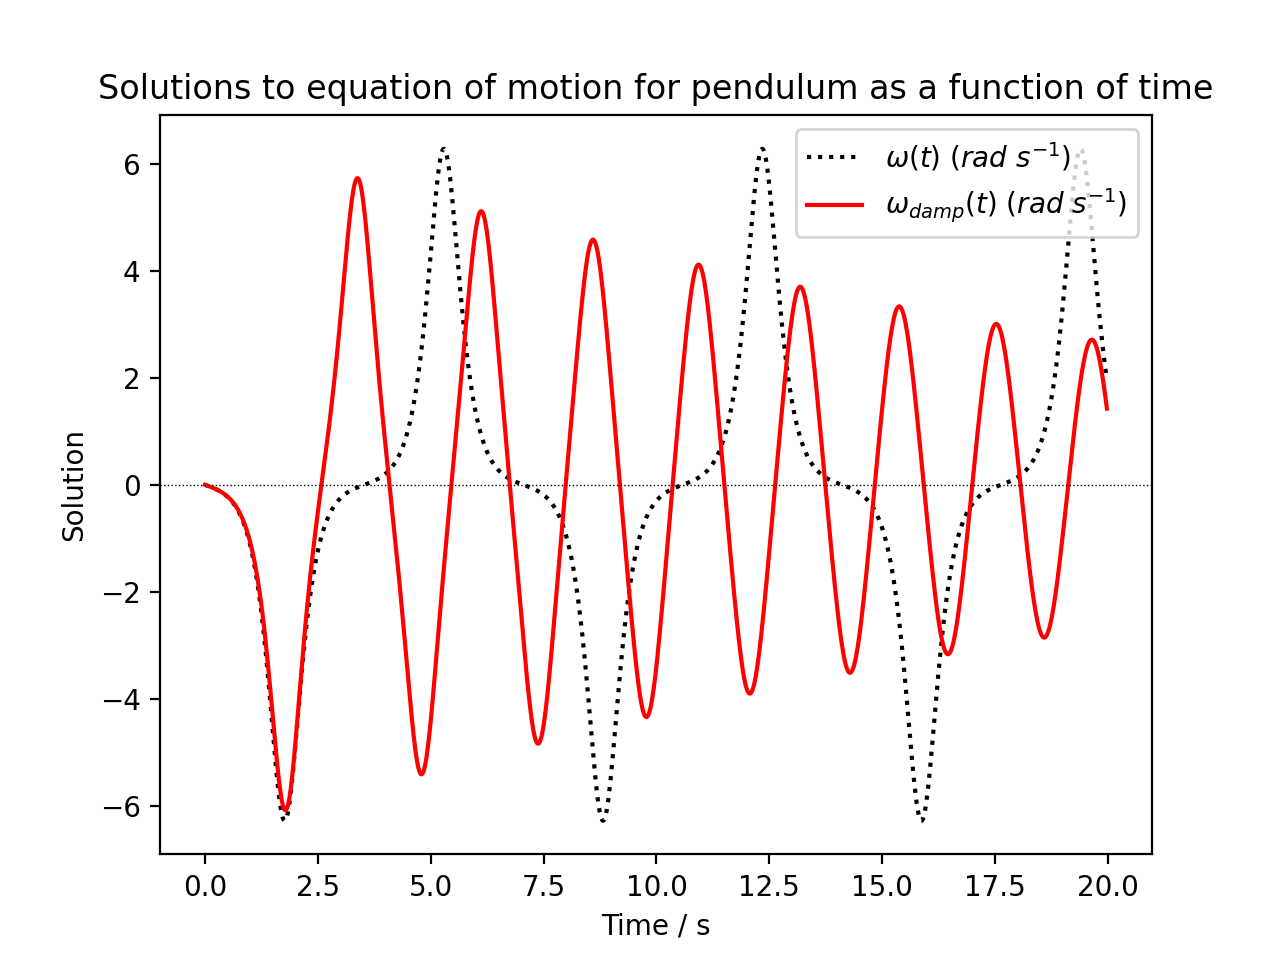

In [8]:
M = 0.1 # mass of bob (kg)
c = 0.01 # damping constant (Ns/m)

Rdamp = RK_2D(r,tpoints,angular_damp) # numerical solutions from RK method

#label for damped plots
labeldamp = ["$\\theta_{damp}(t)$ ($rad$)", "$\omega_{damp}(t)$ ($rad$ $s^{-1}$)"]
# plots figures for both
for i in range(0,2):
    plt.figure()
    plt.title("Solutions to equation of motion for pendulum as a function of time")
    plt.plot(tpoints,R[i],"k:", label = label[i])
    plt.plot(tpoints,Rdamp[i],"r", label =labeldamp[i])
    plt.xlabel("Time / s")
    plt.ylabel("Solution")
    plt.axhline(c="k",ls=":", lw=0.5) # draw black dotted line at theta,omega = 0
    plt.legend(loc="best") ;

Combined phase plot and animation of pendulum.

In [ ]:
from vpython import sphere, cylinder, color, rate, vector, gcurve, canvas, graph

win=450 # canvas window size parameter

##############################################################
### Set up the animation window objects
animation = canvas(width=win, height=win, align='left')

# first set up the objects:
pivot = vector(0,0,0) # pivot point at centre of display


### for the undamped system...
# the rigid rod connecting the bob to the pivot point...
rod = cylinder(pos=pivot, axis = vector(L*np.sin(initialtheta),-L*np.cos(initialtheta),0), 
                      radius = 0.01, color=color.green, opacity = 0.5)

# ...and the bob.
bob = sphere(pos=vector(L*np.sin(initialtheta),-L*np.cos(initialtheta),0), 
                      radius = 0.1, color=color.blue, opacity = 0.5)


### for the damped system
# the rigid rod connecting the bob to the pivot point...
rod_d = cylinder(pos=pivot, axis = vector(L*np.sin(initialtheta),-L*np.cos(initialtheta),0), 
                      radius = 0.01, color=color.magenta)

# ...and the bob.
bob_d = sphere(pos=vector(L*np.sin(initialtheta),-L*np.cos(initialtheta),0), 
                      radius = 0.1, color=color.purple)

###################################################################
### Set up the graph windows 
### see https://www.glowscript.org/docs/VPythonDocs/graph.html for info and documentation

graph1 = graph(width=win, height=win/2, align="right",
      title='<b> θ (cyan), ω (red)</b>',
      xtitle='<i>time (s)</i>', ytitle='<i>θ (rads), ω (rads/s)</i>',
      foreground=color.black, background=color.white,
      xmin=0, xmax=20, ymin=-6, ymax=6)

graph2 = graph(width=win, height=win/2, align="right",
      title='<b>Phase space: undamped (green), damped (magenta) </b>',
      xtitle='<i>θ (rads) </i>', ytitle='<i>ω (rads/s)</i>',
      foreground=color.black, background=color.white,
      xmin=-4, xmax=4, ymin=-7, ymax=7)

# set up the curve objects for the plots
anglecurve = gcurve(graph=graph1, color=color.cyan) # a graphics curve for the *angle*
velcurve = gcurve(graph=graph1, color=color.red)    # a graphics curve for the *angular velocity*, etc
phasecurvedamp = gcurve(graph=graph2, color=color.magenta)
phasecurveundamp = gcurve(graph=graph2, color=color.green)


####################################################################
# Run the animation:
# Loop over the solutions already calculated 
for i in range(0,N):
    
    ### Main vpython animation:
    angle = R[0,i]         # undamped solution
    angle_d = Rdamp[0,i] # damped solution
                              # you may need to edit the variable names
                              # depending on your own implementation
    
    ## undamped system:
    # change the axis of the bob
    rod.axis = vector(L*np.sin(angle), -L*np.cos(angle),0)
    #update the position of the bob:
    bob.pos = vector(L*np.sin(angle),-L*np.cos(angle),0)
    
    ## damped system:
    #
    #
    # ADD CODE AND COMMENTS HERE TO ANIMATE FOR THE DAMPED SYSTEM 
    # USING YOUR RESULTS FROM ABOVE
    # change the axis of the damped bob
    rod_d.axis = vector(L*np.sin(angle_d), -L*np.cos(angle_d),0)
    #update the position of the damped bob:
    bob_d.pos = vector(L*np.sin(angle_d),-L*np.cos(angle_d),0)
    

    ### Plot window animations
    tpoint = i*tf/N # scale the t-component manually
    ## Update the curves with the current animation point:
    
    # first for the plot of posn and velocity against time...
    anglecurve.plot(tpoint,Rdamp[0,i] )
    # ADD A LINE OF CODE HERE TO COMPLETE THE CURVE OF $\omega$ AGAINST t
    velcurve.plot(tpoint,Rdamp[1,i])
    # ...then for the plot in phase space
    # ADD CODE HERE TO ANIMATE THE PLOT OF $\omega$ AGAINST $\theta$
    # FOR THE UNDAMPED (use phasecurveundamp object) AND DAMPED
    # (use phasecurvedamp object) SOLUTIONS
    phasecurvedamp.plot(Rdamp[0,i],Rdamp[1,i])
    phasecurveundamp.plot(R[0,i],R[1,i])
    
    rate(50) # framerate for all windows
    

The phase plot shows how the angular velocity changes with the angle of the pendulum bob, both being with respect to an increasing time, t. It shows all the possible states of a system that can be represented. A closed path on a phase space plot means that the oscillaitons are constant, like the undamped pendulum bob. However an open path means that each osicllation is changing, like in the damped pendulum bob case. 

As you follow the phase space line, it represents the pendulum bobs motion with an increasing time. As $t \rightarrow \infty$, the purple line that represents the damped pendulum bob will reach the coordinates $(0,0)$ meaning that the pendulum will be stationary. However the green closed line representing the undamped pendulum bob will continue following the same path, as $t \rightarrow \infty$.